In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data=pd.read_csv("../DataSets/Decision_tree/Obesity Classification.csv")

### Analyze the dataset

In [3]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
data.shape

(108, 7)

In [5]:
data.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [7]:
data.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe(include="all")

,ID,Age,Gender,Height,Weight,BMI,Label
count,108.000000,108.000000,108,108.000000,108.000000,108.000000,108
unique,NaN,NaN,2,NaN,NaN,NaN,4
top,NaN,NaN,Male,NaN,NaN,NaN,Underweight
freq,NaN,NaN,56,NaN,NaN,NaN,47
mean,56.046296,46.555556,NaN,166.574074,59.490741,20.549074,NaN
std,31.917939,24.720620,NaN,27.873615,28.856233,7.583818,NaN
min,1.000000,11.000000,NaN,120.000000,10.000000,3.900000,NaN
25%,28.750000,27.000000,NaN,140.000000,35.000000,16.700000,NaN
50%,56.500000,42.500000,NaN,175.000000,55.000000,21.200000,NaN
75%,83.250000,59.250000,NaN,190.000000,85.000000,26.100000,NaN


### Data visualization

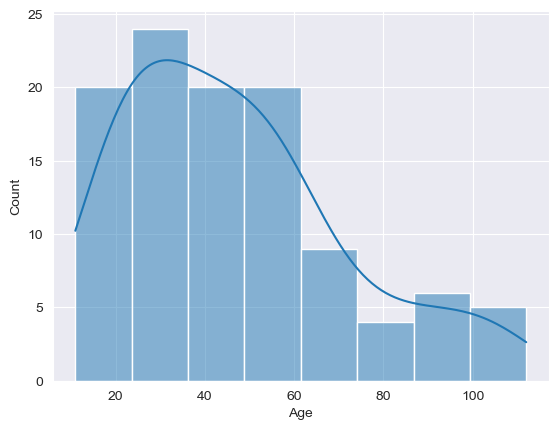

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


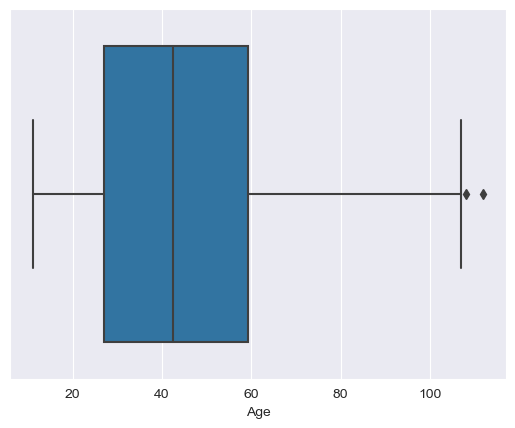

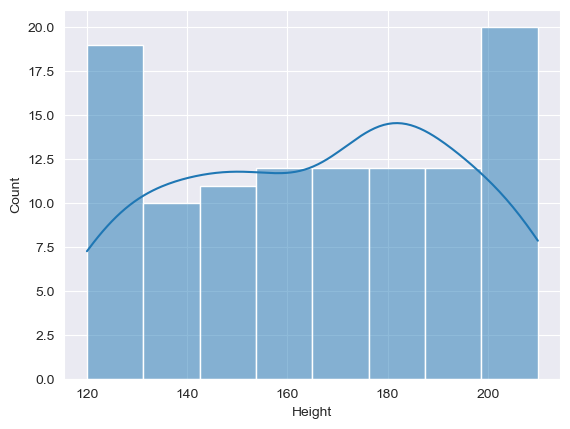

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


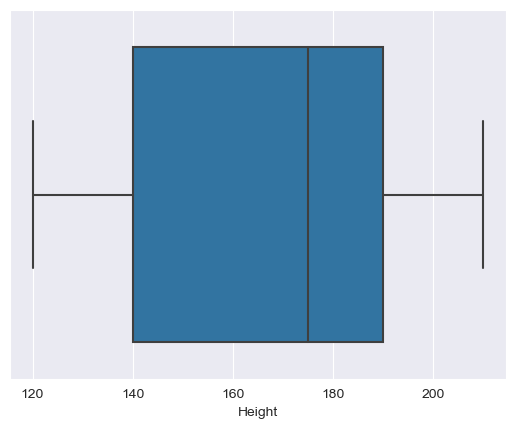

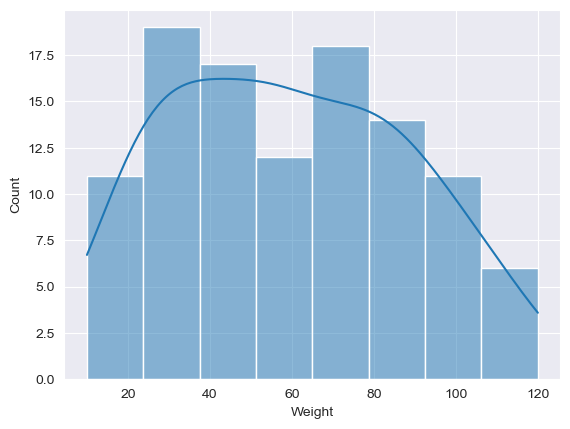

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


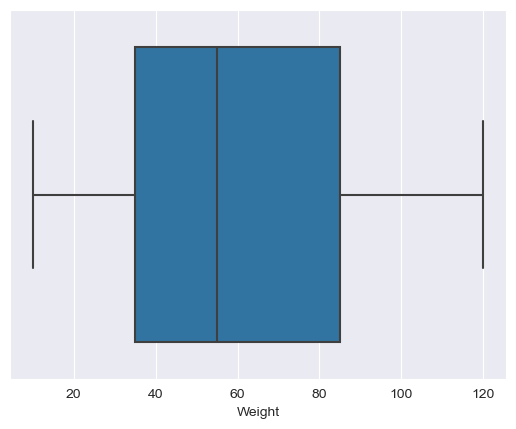

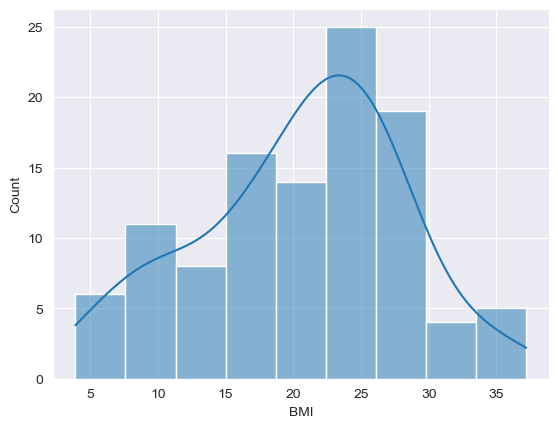

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


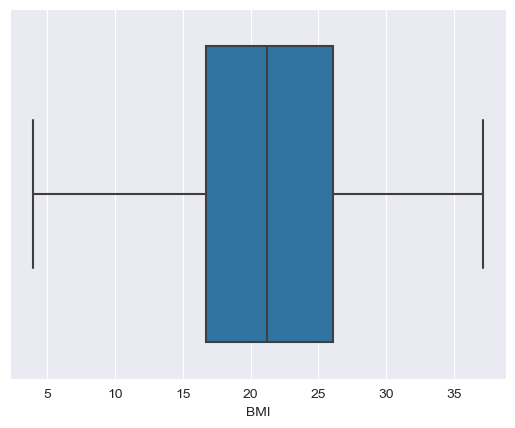

In [10]:
# Visualize the data of ech variable
list_of_variable=['Age','Height', 'Weight', 'BMI']
for col in list_of_variable:
    sns.histplot(data[col],kde="True")
    plt.show()
    sns.boxplot(data[col])
    plt.show()

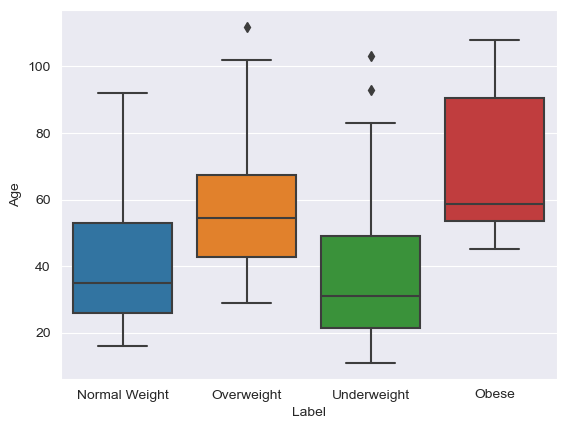

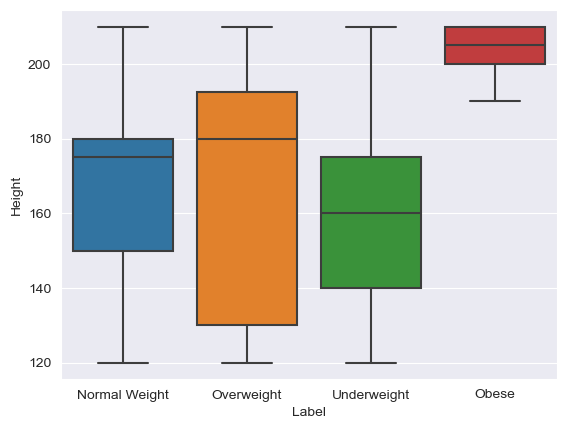

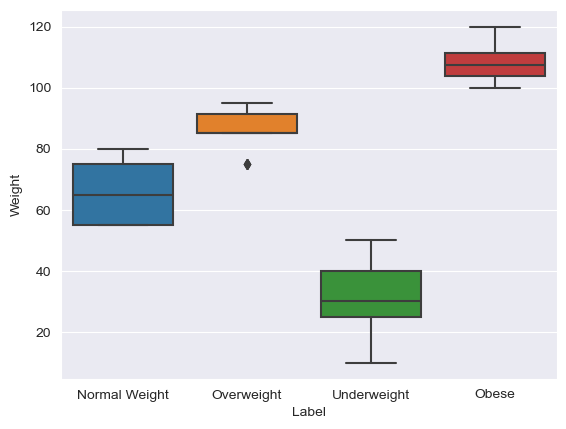

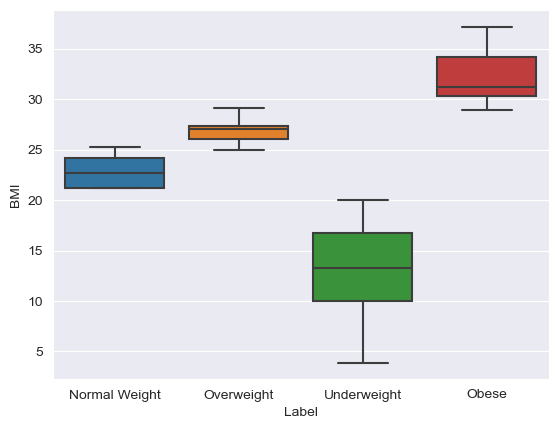

In [11]:
# Visualize the relationship between each variable and the target variable
for col in list_of_variable:
    sns.boxplot(x=data['Label'], y=data[col])
    plt.show()

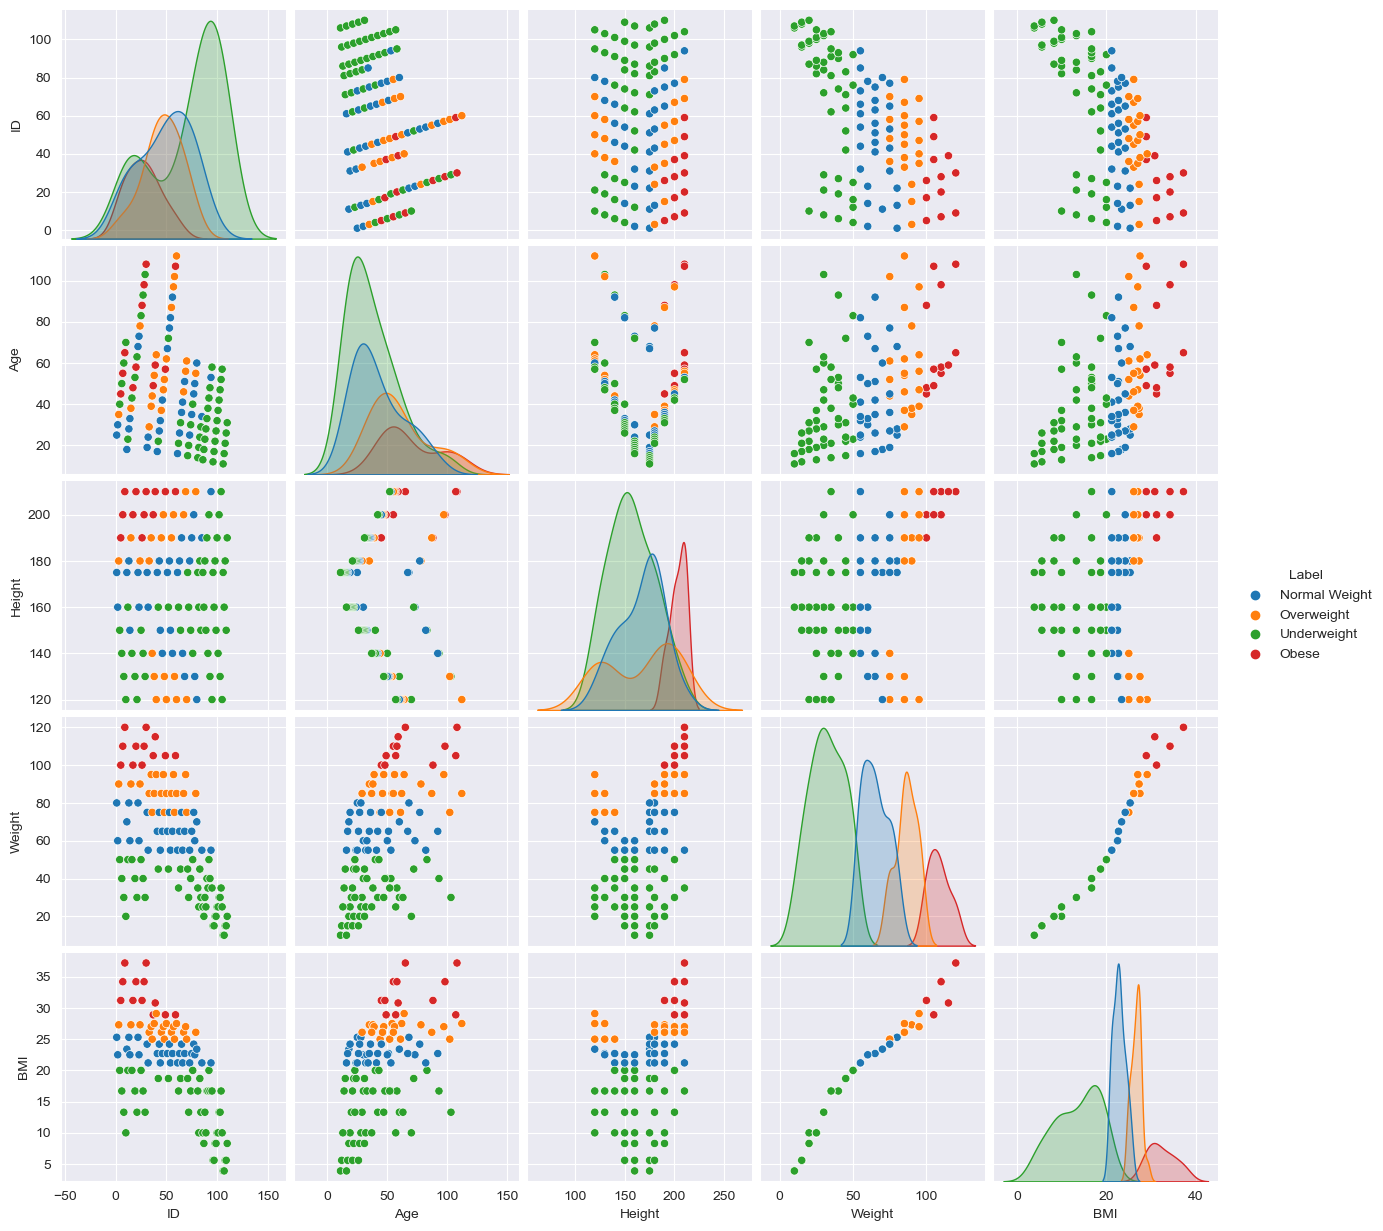

In [12]:
sns.pairplot(data,hue="Label")

### Preprocess the data

In [13]:
# Drop the "id" column as it is not useful for classification
data.drop('ID', axis=1, inplace=True)

# Encode the target variable "Label" using LabelEncoder
encoder = LabelEncoder()
data['Label'] =encoder.fit_transform(data['Label'])
## Encode the variable "Gender" using LabelEncoder
data["Gender"]=encoder.fit_transform(data["Gender"])

In [14]:
# Split the data into independent variables (X) and dependent variable (y)
X = data.drop(["Label"],axis=1)
y = data["Label"]

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

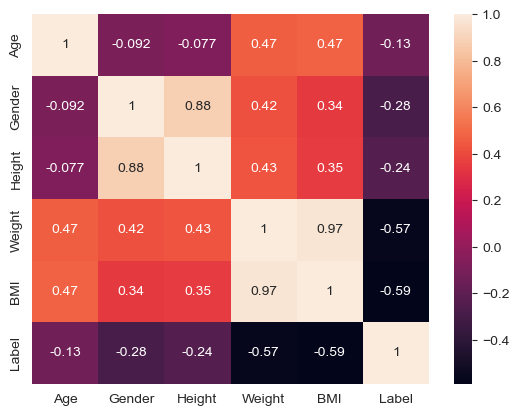

In [15]:
sns.heatmap(data.corr(), annot=True)

### Train a classification model

In [16]:
# Create a decision tree
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict labels for the test data
y_pred = clf.predict(X_test)

### Evaluate the model performance

Accuracy: 1.0


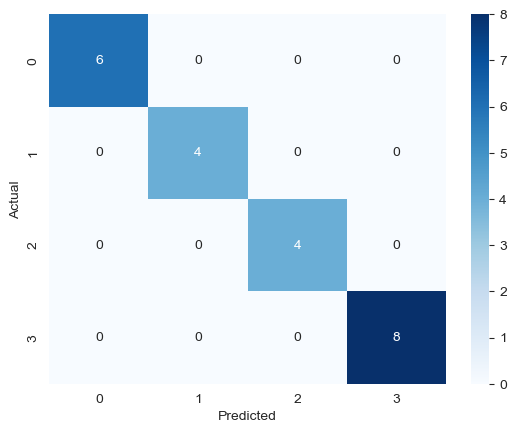

In [17]:
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()